In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
import eli5
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import joblib

In [6]:
test_df = pd.read_csv(r'C:\Users\rjhcl\Desktop\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\test.csv')
train_df = pd.read_csv(r'C:\Users\rjhcl\Desktop\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\train.csv')

In [7]:
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [12]:
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
test_df.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,ae3ebd322baaff16,""" \n :::Wikipedia does not require reliable so..."
freq,1,1


In [16]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [17]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


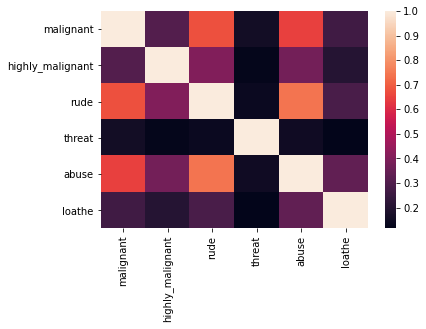

In [18]:
print(train_df.corr())
print(sns.heatmap(train_df.corr()))

In [19]:
# lets check the skewness of our train dataset

In [21]:
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


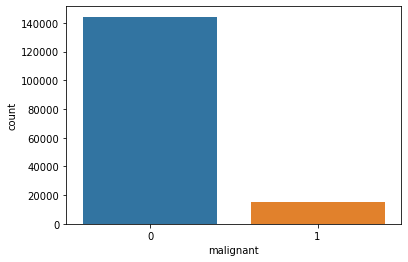

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


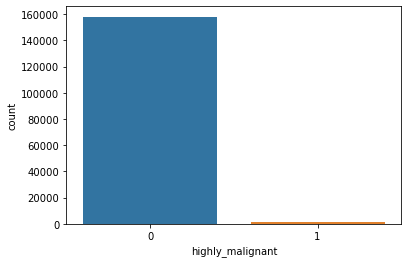

loathe


0    158166
1      1405
Name: loathe, dtype: int64


C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


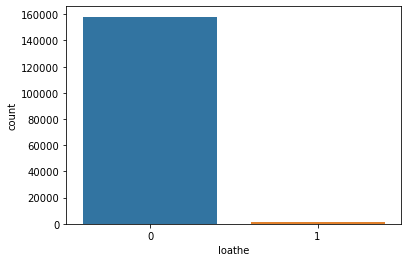

rude


0    151122
1      8449
Name: rude, dtype: int64


C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


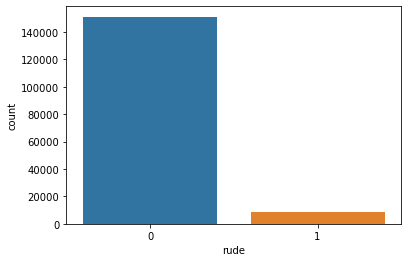

abuse


0    151694
1      7877
Name: abuse, dtype: int64


C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


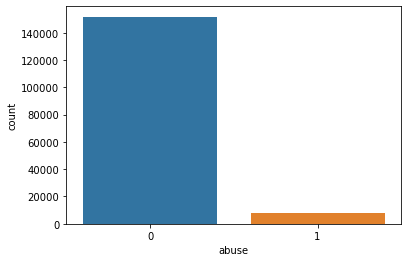

threat


0    159093
1       478
Name: threat, dtype: int64


C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


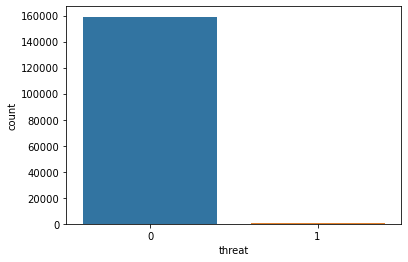

In [23]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train_df[i].value_counts())
    sns.countplot(train_df[i])
    plt.show()

In [24]:
# from the above plots we can say that compared to malignant comments other comments are very less

In [25]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [26]:
# cleaning our dataset

# Replace email addresses with 'email'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
test_df['comment_text'] = test_df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
test_df['comment_text'] = test_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
test_df['comment_text'] = test_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
test_df['comment_text'] = test_df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

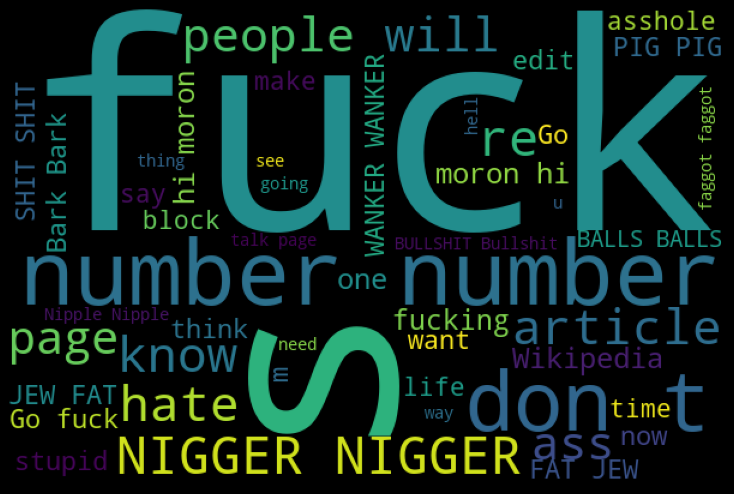

In [29]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train_df['comment_text'][train_df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

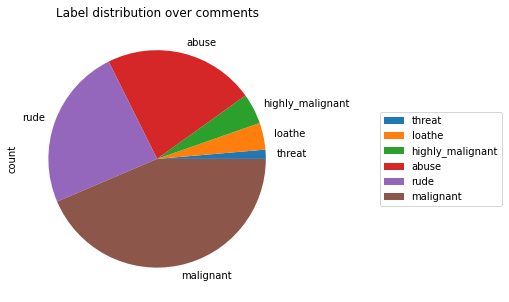

In [30]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train_df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [31]:
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rjhcl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
for i in range(len(test_df['comment_text'])):
    test_df['comment_text'][i]= test_df['comment_text'][i].lower()
    j = []
    for word in test_df['comment_text'][i].split():
        j.append((lemmatiser.lemmatize(word,pos="v")))
        test_df['comment_text'][i]= " ".join(j)

In [34]:
for i in range(len(train_df['comment_text'])):
    train_df['comment_text'][i]= train_df['comment_text'][i].lower()
    l = []  
    for word in train_df['comment_text'][i].split():
        l.append((lemmatiser.lemmatize(word,pos="v")))
        train_df['comment_text'][i]= " ".join(l)

<ipython-input-34-1b84554a0ab3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment_text'][i]= train_df['comment_text'][i].lower()
<ipython-input-34-1b84554a0ab3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment_text'][i]= " ".join(l)


In [35]:
# lets seperate labels and comments
# comments:
comment = train_df['comment_text']
print(comment.head())

# labels:
label = train_df[['malignant','highly_malignant','rude','threat','abuse', 'loathe']]
print(label.head())

0    explanation why the edit make under my usernam...
1    d aww he match this background colour i m seem...
2    hey man i m really not try to edit war it s ju...
3    more i can t make any real suggestions on impr...
4    you sir be my hero any chance you remember wha...
Name: comment_text, dtype: object
   malignant  highly_malignant  rude  threat  abuse  loathe
0          0                 0     0       0      0       0
1          0                 0     0       0      0       0
2          0                 0     0       0      0       0
3          0                 0     0       0      0       0
4          0                 0     0       0      0       0


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss

tf_vec = TfidfVectorizer()

In [37]:
x=tf_vec.fit_transform(comment)

In [57]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
train_df['bad'] =train_df[cols_target].sum(axis =1)

In [59]:
y = train_df['bad']

In [60]:
naive = MultinomialNB()

In [61]:
test_df.drop(['id'],axis=1)

,comment_text
0,yo bitch ja rule be more succesful then you ll...
1,from rfc the title be fine as it be imo
2,source zawe ashton on lapland
3,if you have a look back at the source the info...
4,i don t anonymously edit article at all
...,...
153159,i totally agree this stuff be nothing but too ...
153160,throw from out field to home plate do it get t...
153161,okinotorishima categories i see your change an...
153162,one of the found nations of the eu germany hav...


In [66]:
# Train and predict
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

naive.fit(x_train,y_train)

y_pred= naive.predict(x_test)


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

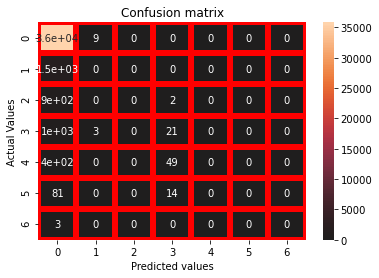

In [67]:

# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual Values')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['malignant','highly_malignant','rude','threat','abuse', 'loathe'])
ax.yaxis.set_ticklabels(['malignant','highly_malignant','rude','threat','abuse', 'loathe'])
plt.show()

In [68]:
import joblib
joblib.dump(y_pred, "model")

['model']